# Brain Scaffold Builder demo

## Introduction to the BSB

The **Brain Scaffold Builder** is a framework that allows you to create workflows to reconstruct and simulate neural network models.

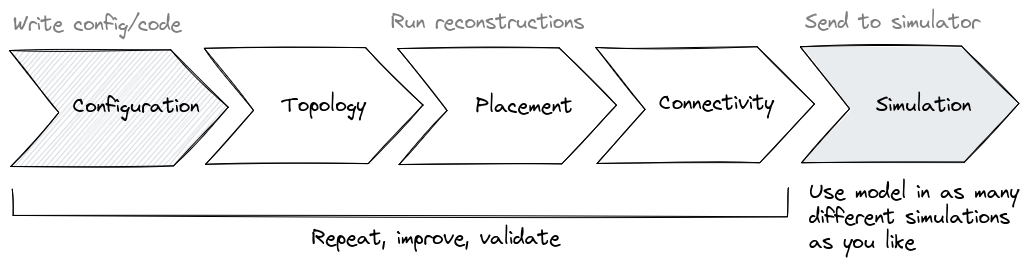

A typical workflow of the BSB works as follows:
- The user provides a configuration that describes the network they want to reconstruct and simulate.
- It is interpreted by the BSB as a series of tasks to perform.
- The BSB creates the topology of the network (i.e., its shape and size).
- The BSB places cells within the network, following a defined strategy.
- The BSB connects the aforementioned cells according to connectivity rules.
- The final circuit is simulated with an external simulator, with the BSB serving as an intermediate to deal with the model.

For each step of this workflow, the BSB also provides a list of predefined strategies and tools to create your own with as little difficulty as possible. Hence, for most of your reconstructions, you may not have to code!

The BSB acts here as a black box with an extended interface to allow you to properly parametrize it.

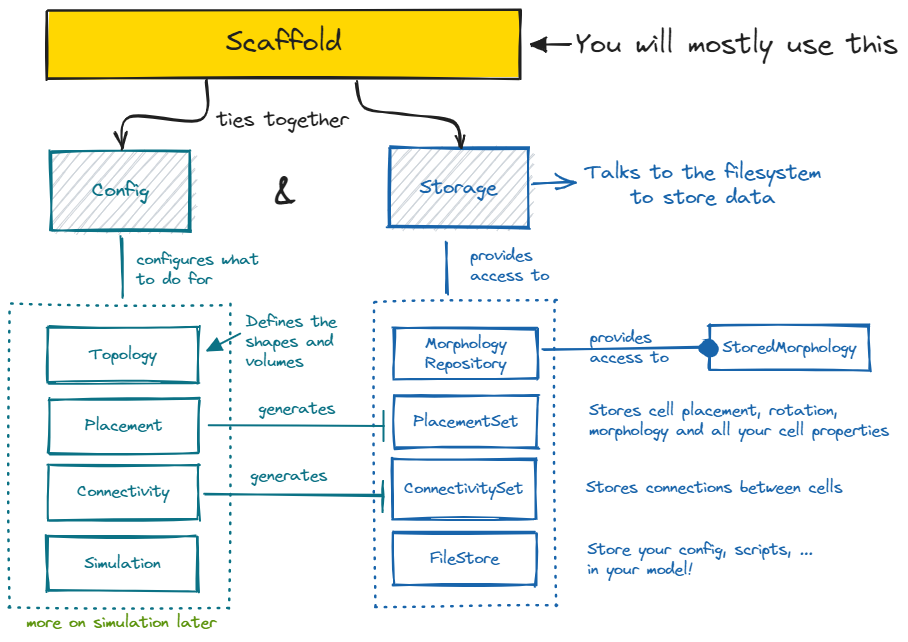

The Brain Scaffold Builder revolves around the `Scaffold` object. A scaffold ties together all the information in the `Configuration` with the `Storage`. The configuration contains your model description, while the storage contains your model data, like concrete cell positions or connections.

Using the scaffold object, one can turn the abstract model configuration into a concrete storage object full of neuroscience.

To do so, the configuration leverages configurable objects to describe the underlying neural network, called components. Components define which methods and parameters should be used to reconstruct and simulate the network.

Assembled together these components form a linear workflow that will build your network from scratch.
Through this interface, lies the ultimate goal of the entire framework:
To let you explicitly define every component that is a part of your model, and all its related parameters, in such a way that a single command line, `bsb compile`, can turn your configuration into a reconstructed biophysically detailed large scale neural network.

## Setup environment

### Install bsb


This demo will install the BSB inside this google colab. If you want to install the BSB on your PC, check the [BSB installation guide](https://bsb.readthedocs.io/en/latest/getting-started/installation.html)

If you incounter any problem during this demo regarding the BSB, you can submit an issue on the [BSB repository](https://github.com/dbbs-lab/bsb/issues)


Install bsb with the neuron simulator extension with the following command:

In [1]:
!pip install -q bsb[neuron,parallel]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 20.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.8/28.8 MB 50.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 219.1/219.1 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 75.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 90.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.2/101.2 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 541.1/541.1 kB 30.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━

Now we are using an old version of numpy so a pip error should appear but the package should be installed correctly anyways

❗**Restart your session before proceeding** by clicking on Runtime / Restart session

In [1]:
# Check that you can import bsb
import bsb
bsb.__version__

'5.0.2'

### Link this jupyter notebook to your google drive


This cell will open a pop up window in which google will ask you to which google drive
account you want to link this jupyter notebook. This way you can access its files from here.

In [2]:
from google.colab import drive, output

drive.mount("/content/drive", force_remount=True)
output.enable_custom_widget_manager()

Mounted at /content/drive


Set your python working directory to be inside your google drive so that the file produced end up in it.

In [ ]:
%matplotlib inline

from collections.abc import Mapping
import json
import matplotlib.pylab as plt
import numpy as np
import os
from os.path import isfile, join
from os import listdir
from sys import path

ROOT_FOLDER = "/content/drive/MyDrive/Colab Notebooks"
os.chdir(ROOT_FOLDER)

## Your first network

The following tutorial is based on the [BSB documentation](https://bsb.readthedocs.io/en/latest/getting-started/getting-started_reconstruction.html). You can find more information on the BSB in it, so we advise you to keep it open on the side 😉

Use the command below to create a new BSB project directory and some starter files:

In [ ]:
!bsb new tutorial_bsb --quickstart --json

Created 'tutorial_bsb' project structure.


In [ ]:
os.chdir(join(ROOT_FOLDER, "tutorial_bsb"))

In this folder, you will find a pre-filled json configuration that we will leverage to build our network. Open it through the `Files` button on the left panel.

The configuration contains already a partition `base_layer`, a cell_type `base_type` and a placement strategy `example_placement`.

Circuit_1.svg

These minimal components are enough to compile your first network. You can do this from the terminal:

In [ ]:
!bsb compile network_configuration.json -v 3 --clear

Compiling the following strategies: example_placement
Starting placement strategies: example_placement
[2025-05-26 14:59:43.001652 - BSB] JobStatus.RUNNING {root}.placement.example_placement
Placing 390 base_type in [0 0 0]
[2025-05-26 14:59:43.051056 - BSB] JobStatus.SUCCESS {root}.placement.example_placement
[2025-05-26 14:59:43.051253 - BSB] JobStatus.RUNNING {root}.placement.example_placement
Placing 390 base_type in [0 1 0]
[2025-05-26 14:59:43.082233 - BSB] JobStatus.SUCCESS {root}.placement.example_placement
[2025-05-26 14:59:43.082404 - BSB] JobStatus.RUNNING {root}.placement.example_placement
Placing 390 base_type in [1 0 0]
[2025-05-26 14:59:43.115854 - BSB] JobStatus.SUCCESS {root}.placement.example_placement
[2025-05-26 14:59:43.115949 - BSB] JobStatus.RUNNING {root}.placement.example_placement
Placing 390 base_type in [1 1 0]
[2025-05-26 14:59:43.148132 - BSB] JobStatus.SUCCESS {root}.placement.example_placement
Starting connectivity strategies: 


We will now modify our configuration file to add more layers cell types and connections.

The function in the following cell will automatically modify your json configuration with the changes that we will introduce in the tutorial.

❗To see the effect on your json file, you will need to re-open it.

In [ ]:
def update_json_configuration(
    update_dict: dict,
    configuration_filename: str="network_configuration.json",
  ):
  """
  Update the content of the BSB json configuration file with the dictionary
  given as input
  """
  if isfile(configuration_filename):
    with open(configuration_filename, "r") as f:
      data = json.load(f)
  else:
    data = {}

  deep_update(data, update_dict)

  with open(configuration_filename, "w") as f:
    json.dump(data, f, indent=4)

def deep_update(d: dict, u: Mapping):
    """
    Recursively update a dictionary d based on a dictionary u.
    u will overwrite any keys also in d.

    :return: merged dictionary
    :rtype: dict
    """
    for k, v in u.items():
        if isinstance(v, Mapping):
            d[k] = deep_update(d.get(k, {}), v)
        else:
            d[k] = v
    return d

Your network model needs a description of its shape, which is called the topology of the network. The topology consists of 2 components: `Regions` and `Partitions`. `Regions` combine multiple partitions and/or regions together, in a hierarchy, all the way up to a single topmost region, while partitions are exact pieces of volume that can be filled with cells.

To get started, update our json file with a second layer `top_layer`, and a region `brain_region` inside our json file:

In [ ]:
update_dict = {
  "regions": {
    "brain_region": {
      "type": "stack",  # partitions inside this region will be organized in a stack
      "children": ["base_layer", "top_layer"]
    }
  },
  "partitions": {
    "top_layer": {
      "type": "layer",  #  Layers specify their size in one dimension,
                        #  and fill up the space in the other dimensions.
      "thickness": 100  # thickness of the layer,
    }
  }
}

update_json_configuration(update_dict)

To populate our new `top_layer`, we will create an extra cell type `top_type`; this time we want to a place `40` of these cells and their soma radius of `7`.

In [ ]:
update_dict = {
  "cell_types": {
    "top_type": {
      "spatial": {
        "radius": 7,
        "count": 40  # Counts of cell in the whole circuit
      }
    }
  },
}
update_json_configuration(update_dict)

Now that we have defined our new `top_type`, we should place it in our `top_layer`:

In [ ]:
update_dict = {
  "placement": {
    "top_placement": {
      "strategy": "bsb.placement.RandomPlacement",  # will place the cells randomly in the partition
      "cell_types": ["top_type"],
      "partitions": ["top_layer"]
    }
  },
}
update_json_configuration(update_dict)

This is the circuit you should have now:

Circuit_2.svg

Here, we are going to connect all `base_type` cells to all `top_type` cells.

In [ ]:
update_dict = {
  "connectivity": {
    "A_to_B": {
      "strategy": "bsb.connectivity.AllToAll",  # Connect all the presynaptic cells to all postsynaptic cells
      "presynaptic": {
        "cell_types": ["base_type"]
      },
      "postsynaptic": {
          "cell_types": ["top_type"]
      }
    }
  }
}
update_json_configuration(update_dict)

You should now try to compile your network again to take into account of the changes in the json configuration. BSB will also check if you did any mistake:

In [ ]:
!bsb compile network_configuration.json -v 3 --clear

Compiling the following strategies: example_placement, top_placement, A_to_B
Clearing data
Starting placement strategies: example_placement, top_placement
[2025-05-26 15:14:44.747902 - BSB] JobStatus.RUNNING {root}.placement.example_placement
Placing 390 base_type in [0 0 0]
[2025-05-26 15:14:44.783931 - BSB] JobStatus.SUCCESS {root}.placement.example_placement
[2025-05-26 15:14:44.784138 - BSB] JobStatus.RUNNING {root}.placement.example_placement
Placing 390 base_type in [0 1 0]
[2025-05-26 15:14:44.814234 - BSB] JobStatus.SUCCESS {root}.placement.example_placement
[2025-05-26 15:14:44.814338 - BSB] JobStatus.RUNNING {root}.placement.example_placement
Placing 390 base_type in [1 0 0]
[2025-05-26 15:14:44.845072 - BSB] JobStatus.SUCCESS {root}.placement.example_placement
[2025-05-26 15:14:44.845202 - BSB] JobStatus.RUNNING {root}.placement.example_placement
Placing 390 base_type in [1 1 0]
[2025-05-26 15:14:44.894854 - BSB] JobStatus.SUCCESS {root}.placement.example_placement
[2025-05-

## Manipulate the produced network

You can load a stored network from file using the method from_storage:

In [ ]:
from bsb import from_storage

scaffold = from_storage("network.hdf5")

The Configuration of a Scaffold is available as `scaffold.configuration`. Its root components such as `cell_types`, `placement` and others are also directly available in the Scaffold object, so you can avoid some needless typing and repetition.

In [ ]:
config = scaffold.configuration
print(f"My network has {len(config.cell_types)} cell types: {list(config.cell_types.keys())}")
# config.cell_types is equivalent to scaffold.cell_types

My network has 2 cell types: ['base_type', 'top_type']


The placement data is available through the `PlacementSet` interface. You can access stored placement sets through their name or their cell type. This example shows how to access the cell positions of each population:

In [ ]:
for type_name, cell_type in scaffold.cell_types.items():
    ps = cell_type.get_placement_set()
    pos = ps.load_positions()
    print(f"{len(pos)} {type_name} placed")
    # The positions are a (Nx3) numpy array
    print("The median cell is located at", np.median(pos, axis=0))

1560 base_type placed
The median cell is located at [100.01258832  99.96957161  50.48581744]
40 top_type placed
The median cell is located at [ 95.96507052  98.11821905 154.59329424]


The connectivity data is available through the `ConnectivitySet` interface. Connection sets are labelled by default according to the connection strategy used to obtain them (and the pre and postsynaptic cell types in case their are more than one).

Here we are going to retrieve one connection set using its name (`"A_to_B"`) and print the neuron id of each connected pair.

In [ ]:
cs = scaffold.get_connectivity_set("A_to_B")
for src_locs, dest_locs in cs.load_connections():
    print(f"Cell id: {src_locs[0]} connects to cell {dest_locs[0]}")

Cell id: 125 connects to cell 1
Cell id: 48 connects to cell 5
Cell id: 59 connects to cell 5
Cell id: 117 connects to cell 5
Cell id: 161 connects to cell 5
Cell id: 174 connects to cell 5
Cell id: 209 connects to cell 5
Cell id: 227 connects to cell 5
Cell id: 241 connects to cell 5
Cell id: 131 connects to cell 9
Cell id: 290 connects to cell 9
Cell id: 378 connects to cell 9
Cell id: 15 connects to cell 20
Cell id: 36 connects to cell 20
Cell id: 52 connects to cell 20
Cell id: 77 connects to cell 20
Cell id: 100 connects to cell 20
Cell id: 114 connects to cell 20
Cell id: 155 connects to cell 20
Cell id: 160 connects to cell 20
Cell id: 178 connects to cell 20
Cell id: 209 connects to cell 20
Cell id: 218 connects to cell 20
Cell id: 246 connects to cell 20
Cell id: 255 connects to cell 20
Cell id: 291 connects to cell 20
Cell id: 301 connects to cell 20
Cell id: 314 connects to cell 20
Cell id: 347 connects to cell 20
Cell id: 359 connects to cell 20
Cell id: 70 connects to cell

## Adding morphologies

In this section, we are going to assign a morphology to each neuron of our circuit and deduce the connections they form from the apposition of their neurites.

First, let's download 2 morphology files from the [Neuromorpho](https://neuromorpho.org/) website, in the swc format.
For instance, let's download a Golgi cell and a Purkinje cell morphologies

In [ ]:
!curl -o neuron_A.swc https://neuromorpho.org/dableFiles/nusser/CNG%20version/GlyT2_030_Slice3_Stellate_cell.CNG.swc
!curl -o neuron2.swc https://neuromorpho.org/dableFiles/watt/CNG%20version/WT_P13_C9.CNG.swc

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  104k  100  104k    0     0   670k      0 --:--:-- --:--:-- --:--:--  668k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 47961  100 47961    0     0   529k      0 --:--:-- --:--:-- --:--:--  532k


Let's see what these morphologies look like:

In [ ]:
from bsb import parse_morphology_file

def plot_morphology(morphology_file:str, title:str):
  morpho = parse_morphology_file(morphology_file)

  fig = plt.figure(figsize=(10, 10))
  ax1 = fig.add_subplot(111, projection="3d")
  for branch in morpho.branches:
      x, z, y = branch.points.T
      # filter labels to use a different color for dendrites and axons
      is_axon = np.array(
          [
              np.isin(list(branch.labelsets[branch.labels[i]]), ["axon"]).any()
              for i in range(len(branch.points))
          ]
      )
      dendrite, = ax1.plot(x[~is_axon], y[~is_axon], z[~is_axon], c="blue")
      axon, = ax1.plot(x[is_axon], y[is_axon], z[is_axon], c="red")
  ax1.set_xlabel("x [µm]")
  ax1.set_ylabel("y [µm]")
  ax1.set_zlabel("z [µm]")
  ax1.legend([dendrite, axon], ["dendrites", "axon"])
  ax1.set_title(title)
  plt.show()
  # plt.savefig(f"{title}.png", dpi=200)

In [ ]:
plot_morphology("neuron_A.swc", "Stellate cell morphology")
plot_morphology("neuron2.swc", "Purkinje cell morphology")

The first morphology has both its axon (in red) that stretch towards the top (z axis) and its dendrites (in blue)

The second morphology only has dendrites (in blue) stretching across the xy plane.

`morphologies` is a list component of the BSB configuration responsible to fetch and load morphology files.

So first let's add our morphologies to the scaffold:

In [ ]:
update_dict = {
  "morphologies": [
    "neuron_A.swc",  # BSB will assign the name neuron_A to this morphology
    {
      "name": "neuron_B",  # here we rename the morphology as neuron_B
      "file": "neuron2.swc",
    }
  ]
}
update_json_configuration(update_dict)

Then, we need to link the morphologies to the cell types in our network

In [ ]:
update_dict = {
  "cell_types": {
    "base_type": {
      "spatial": {
        "radius": 2.5,
        "density": 3.9e-4,
        "morphologies": ["neuron_A"]
      }
    },
    "top_type": {
      "spatial": {
        "radius": 7,
        "count": 40,
        "morphologies": ["neuron_B"]
      }
    }
  },
}
update_json_configuration(update_dict)

Now that we have assigned morphologies to our cell types, we can use morphology-based connection strategies such as [VoxelIntersection](https://bsb.readthedocs.io/en/latest/connectivity/connection-strategies.html#voxelintersection).

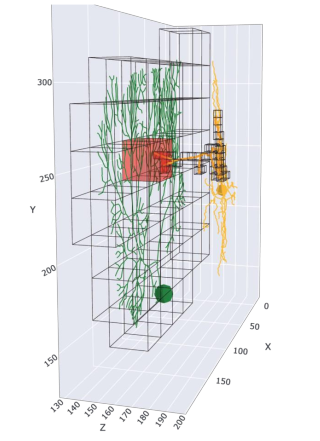

Note that with `VoxelIntersection`, you can specify which parts of the morphologies should create contacts (e.g, dendrites and axons):

In [ ]:
update_dict = {
  "connectivity": {
    "A_to_B": {
      "strategy": "bsb.connectivity.VoxelIntersection",
      "presynaptic": {
        "cell_types": ["base_type"],
        "morphology_labels": ["axon"]
      },
      "postsynaptic": {
          "cell_types": ["top_type"],
          "morphology_labels": ["dendrites"] # Labels are extracted from the SWC file
      },
      "affinity": 0.15  # Fraction of cells forming connections with other cells
                        # with whom their voxels intersect
    }
  }
}
update_json_configuration(update_dict)

Do not forget to recompile your network because we modified the configuration file.

In [ ]:
!bsb compile network_configuration.json -v 3 --clear

## Run your first NEURON simulation

In this tutorial, we present how to configure a [NEURON](https://www.neuron.yale.edu/neuron/) simulation for a multi-compartment neuron network.

We will also need some model files for NEURON, and a stellate cell morphology which you can obtain and link to your project like so:

In [ ]:
# Python library containing NEURON mod files
!pip install -q dbbs-catalogue
# Stellate cell morphology
!curl -o StellateCell.swc https://bsb.readthedocs.io/en/latest/_downloads/c8d7f307e080fb55b76307ab8939756d/StellateCell.swc
# Stellate cell NEURON model
!curl -o Stellate.py https://bsb.readthedocs.io/en/latest/_downloads/1aa600e26f471eb3a6d69a3212d7a50d/Stellate.py

For this example, we will use another network configuration, consisting of a single layer of `stellate_cell` connected through axon-dendrite overlap, using the strategy `VoxelIntersection`.

In [ ]:
new_configuration = {
  "name": "DBBS test stellate rand circuit v4.0",
  "storage": {
    "engine": "hdf5",
    "root": "network_neuron_sim.hdf5"
  },
  "network": {
    "x": 100.0,
    "y": 200.0,
    "z": 300.0,
    "chunk_size": [100, 100, 100]
  },
  "partitions": {
    "stellate_layer": {
      "thickness": 300.0
    }
  },
  "regions": {  # Note that regions is not necessary here because there is only
                # one partition (so no need to create an organization)
    "example_cortex": {
      "type": "stack",
      "children": ["stellate_layer"]
    }
  },
  "morphologies": [
    {
      "file": "StellateCell.swc",
      "parser":{
        # The SWC format allows you to give any label id to each branch point
        # This piece of configuration specifies the labels to assign
        # to each label id
        "tags": {
            16: ["dendrites", "proximal_dendrites"],
            17: ["dendrites", "distal_dendrites"],
            18: ["axon", "axon_initial_segment"]
            }
        }
    }
  ],
  "cell_types": {
    "stellate_cell": {
      "spatial": {
        "radius": 4.0,
        "density": 0.000005,
        "morphologies": [
          {
            "names": ["StellateCell"]
          }
        ]
      }
    }
  },
  "placement": {
    "stellate_placement": {
      "strategy": "bsb.placement.RandomPlacement",
      "partitions": ["stellate_layer"],
      "cell_types": ["stellate_cell"]
    }
  },
  "connectivity": {
    "stellate_to_stellate": {
      "strategy": "bsb.connectivity.VoxelIntersection",
      "presynaptic": {
        "cell_types": ["stellate_cell"],
        "morphology_labels" : ["axon"]
      },
      "postsynaptic": {
        "cell_types": ["stellate_cell"],
        "morphology_labels" : ["dendrites"]
      }
    }
  },
  "simulations": {}
}
update_json_configuration(new_configuration, "configuration_neuron.json")

In [ ]:
!bsb compile --verbosity 3 configuration_neuron.json

We want here to see the postsynaptic response of our cells upon receiving an excitatory input. Each cell will receive one spike on their dendrites and we will check its effect on the postsynaptic current.

Let's start by configuring the global simulation parameters:

In [ ]:
update_dict = {
  "simulations": {
    "neuronsim": {  # Name of the simulation
      "simulator": "neuron",  # name of the simulator
      "duration": 100,  # duration in ms
      "resolution": 0.025,  # timestep resolution in ms
      "temperature": 32,  # temperature in Celcius
      "cell_models": {},  # dictionary for cell parameters
      "connection_models": {},  # dictionary for connection parameters
      "devices": {},  # dictionary for devices to record or stimulate the circuit
    }
  }
}
update_json_configuration(update_dict, "configuration_neuron.json")

For each cell type population in your network, you must assign a NEURON model to define the cell’s behavior.

In short, these models encapsulate all the specifications for ion channels and synapses covering all compartments of the neuron (in our case the file `Stellate.py` that we downloaded earlier).

Open the file `Stellate.py` in your project folder to review its content

Within the model file, you will find a model definition called `definitionStellate`, which includes all the customized parameters. This is the object you will refer to in your configuration. Note also that the parameters for the ion channel mechanisms are in the attribute `cable_types`.

In [ ]:
update_dict = {
    "simulations": {
        "neuronsim" : {
            "cell_models": {
              "stellate_cell": {  # Name here corresponds to the cell_type
                "model": "Stellate.definitionStellate",  # path like an import in python
                                                         # name_model_file.name_model_definition
                "parameters": []  # every parameter in the model file can be overwritten here.
              }
            },
        }
    }
}
update_json_configuration(update_dict, "configuration_neuron.json")

For each connection type of your network, you also need to provide a NEURON model describing its synapses' dynamics.

In this example, to the `stellate_to_stellate` connection is assigned a reference to one of the `synapse_types`, defined in the `Stellate.py` model file: `GABA`.

In [ ]:
update_dict = {
    "simulations": {
        "neuronsim" : {
          "connection_models": {
            "stellate_to_stellate":
            {
              "synapses": [{
                "synapse": "GABA",
                "weight": 0.001,
                "delay": 1
              }]
            }
          },
        }
    }
}
update_json_configuration(update_dict, "configuration_neuron.json")

We will now create 3 devices to interface with our circuit during simulation:
- `spike_generator` is used to produce 1 spike (attribute `number`) at 9 ms and send it to the cell with ID 0 (using the `targetting`) after 1 ms of `delay` and a `weight` of 0.01. The stimulus targets the `AMPA` and `NMDA` (excitatory) synapses located on the `dendrites` of the cell.
- The membrane potential is recorded using a `voltage_recorder`, which collects the signal from within a 100 µm `radius` `sphere` at the center of the circuit. Hence, not all cells might be recorded.
- Synaptic activity is monitored with a `synapse_recorder` for all the synaptic types on the cell's `dendrites`, within the same spherical region. Here too, not all synapses might be recorded.

In [ ]:
update_dict = {
  "simulations": {
      "neuronsim" : {
        "devices": {
          "spike_generator": {
              "device": "spike_generator",
              "start": 9,
              "number": 1,
              "weight": 0.01,
              "delay": 1,
              "targetting": {
                "strategy": "by_id",
                "ids": {"stellate_cell": [0]}  # target stellate cell id 0
              },
              "locations": {
                "strategy": "branch",
                "labels": ["dendrites"]
              },
              "synapses" : ["AMPA", "NMDA"]
            },
        "vrecorder": {
          "device": "voltage_recorder",
          "targetting": {
            "strategy": "sphere",
            "radius" : 100,
            "origin" : [50, 100, 150],  # center of the circuit
            "cell_models" : ["stellate_cell"]
          }
        },
        "synapses_rec":{
          "device": "synapse_recorder",
          "synapse_types": ["AMPA", "NMDA", "GABA"],
          "targetting": {
            "strategy": "sphere",
            "radius" : 100,
            "origin" : [50, 100, 150],
            "cell_models" : ["stellate_cell"]
          },
          "locations":{
            "strategy": "branch",
            "labels": ["dendrites"]
          }
        }
      }
    }
  }
}
update_json_configuration(update_dict, "configuration_neuron.json")

Simulations are separated from the reconstruction pipeline, which means you do not need to recompile your network to add a simulation to your stored `Configuration`. In this example, we only modified the `Configuration` in the `simulations` block but this updates were not been saved in the network file.

So, you need to update your file, using the `reconfigure` command:

In [ ]:
!bsb reconfigure network_neuron_sim.hdf5 configuration_neuron.json

You can now run your simulation (this is going to take a while because we are running with only one core):

In [ ]:
# Create a folder in which to store the simulation results
!mkdir -p simulation-results
# Run the simulation
!bsb simulate network_neuron_sim.hdf5 neuronsim -o simulation-results -v 3

Congratulations 🥳 You have completed your first NEURON simulation with the BSB.

In the following section, we will discuss how to analyze the simulation's results.

## Analyze multi-compartment neuron results

The simulation you have run should have produce a `.nio` file with a named generated by the BSB

This file is an HDF5 file following the [Neo format](https://neo.readthedocs.io/en/latest/read_and_analyze.html) and we will use their library to load content from nio files.

In [ ]:
from neo import io

# Read simulation data

for f in listdir("simulation-results"):
    if f.endswith(".nio"):
        my_file_name = f"simulation-results/{f}"
        break
sim = io.NixIO(my_file_name, mode="ro")
block = sim.read_all_blocks()[0]  # there is one block of data since
                                  # we only ran one simulation
segment = block.segments[0]  # there is onw segment of data since
                             # our recordings are in the same time frame
my_signals = segment.analogsignals  # we take the recorded signal from
                                    # membrane potential and synaptic currents

Each `AnalogSignal` object contains information about the device name, the sampling rate, and an array of the simulated measurement values.

Additional information is available through the `annotations` attribute.

This code below generates 2 plots: one for a postsynaptic synapse and one for the membrane potential. The resulting figures are saved in the simulation-results folder.

In [ ]:
has_plotted_neuron = False  # We will only plot one neuron recording here
has_plotted_synapse = False  # We will only plot one synapse recording here
for signal in my_signals:
    name_device = signal.name  # Retrieve the name of the device
    cell_id = signal.annotations["cell_id"]  # Retrieve the cell ID
    # If the signal comes from a synapse recorder,
    # and if we did not plot a synapse recording yet
    if name_device == "synapses_rec" and not has_plotted_synapse:
        synapse_type = signal.annotations["synapse_type"]
        out_filename = (
            f"simulation-results/{name_device}_{str(cell_id)}_{synapse_type}.png"
        )
        has_plotted_synapse = True
    # If the signal comes from a voltage recorder,
    # and if we did not plot a neuron recording yet
    elif name_device == "vrecorder" and not has_plotted_neuron:
        out_filename = f"simulation-results/{name_device}_{str(cell_id)}.png"
        has_plotted_neuron = True
    # If we plotted both types of recording, we exit the loop
    elif has_plotted_neuron and has_plotted_synapse:
        break
    # We still have some plotting to do
    else:
        continue

    sim_time = signal.times  # Time points of simulation recording

    # Plot and save figure to file in images folder
    plt.figure()
    plt.xlabel(f"Time ({signal.times.units.dimensionality.string})")
    plt.ylabel(f"{signal.units.dimensionality.string}")
    plt.plot(sim_time, signal.magnitude)
    plt.savefig(out_filename, dpi=200)

You have reached the end of this demo of the BSB.

More tutorials, examples are available on the [BSB documentation](https://bsb.readthedocs.io/en/latest/), so check it out !

Let us know if you encounter any bug during the process or if you need help to implement certain features with the BSB on our [Github page](https://github.com/dbbs-lab/bsb/issues)